## TEAM 14:

* Dona Samir Adly - 18P7377
* Steven Sameh Refaat - 18P9325
---

## IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, roc_curve, roc_auc_score, recall_score
from sklearn.metrics import precision_score, accuracy_score, make_scorer
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

## LOADING THE DATASET

In [2]:
df = pd.read_csv('data.csv')
df.columns.values[0]="index"
df=df.set_index("index")
df.shape

(863, 14)

In [3]:
df.head(5)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
index,,,,,,,,,,,,,,
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


## DATA ANALYSIS

### 1. Correlation Analysis:

To observe if two columns are correlated using Pearson Coeffecient as a heatmap

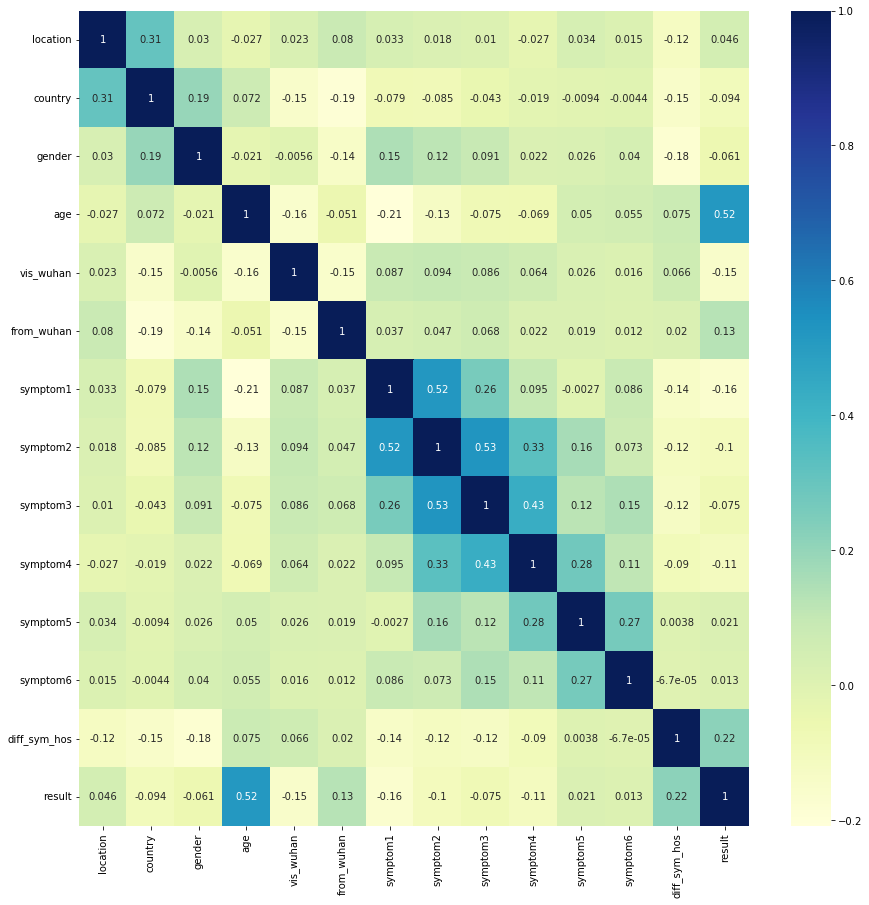

In [4]:
fig, ax = plt.subplots(figsize=(15,15))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)
  
plt.show()

### 2. Scatter Plots: 
Based on the correlation analysis above, we suspect some correlations, so in this part, we plot some important scatter plots, to get a clearer view of the data.

#### a. Age vs. Result: 
Because of the high correlation 0.52

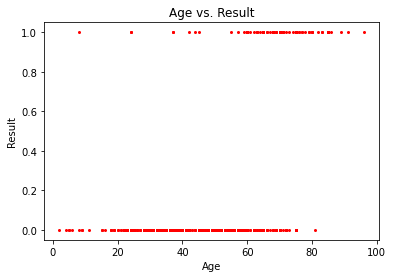

In [5]:
plt.plot(df['age'], df['result'], 'r.', markersize=4)
plt.title("Age vs. Result")
plt.xlabel('Age')
plt.ylabel("Result")
plt.show()

#### b. Symptom 1 vs Symptom 2
Because of their high correlation We suspect that one column of them can be enough and the other could be dropped.

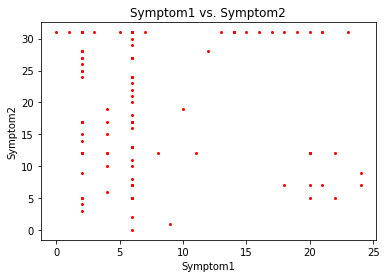

In [6]:
plt.plot(df['symptom1'], df['symptom2'], 'r.', markersize=4)
plt.title("Symptom1 vs. Symptom2")
plt.xlabel("Symptom1")
plt.ylabel("Symptom2")
plt.show()

#### c. Symptom 2 vs Symptom 3
Because of their high correlation, we also suspect that one of them could be dropped

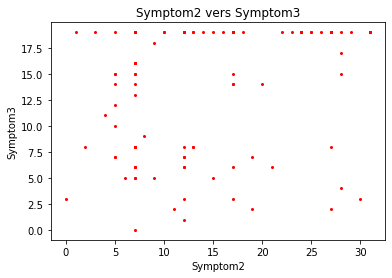

In [7]:
plt.plot(df['symptom2'], df['symptom3'], 'r.', markersize=4)
plt.title("Symptom2 vers Symptom3")
plt.xlabel("Symptom2")
plt.ylabel("Symptom3")
plt.show()

### Conclusion:

Based on these scatter plots, the correaltion between symptom1 and symptom2 is not a strong one. Also, there is no correlation concluded between symptom2 and symptom 3.

__Therefore, We can't drop any of these columns!__

It's concluded from the scatter plot of the Age and Result, that deaths is more frequent with higher age.

## 3. Histograms:
To give better insights about frequency distributions of each feature.

array([[<AxesSubplot:title={'center':'location'}>,
        <AxesSubplot:title={'center':'country'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'vis_wuhan'}>,
        <AxesSubplot:title={'center':'from_wuhan'}>],
       [<AxesSubplot:title={'center':'symptom1'}>,
        <AxesSubplot:title={'center':'symptom2'}>],
       [<AxesSubplot:title={'center':'symptom3'}>,
        <AxesSubplot:title={'center':'symptom4'}>],
       [<AxesSubplot:title={'center':'symptom5'}>,
        <AxesSubplot:title={'center':'symptom6'}>],
       [<AxesSubplot:title={'center':'diff_sym_hos'}>,
        <AxesSubplot:title={'center':'result'}>]], dtype=object)

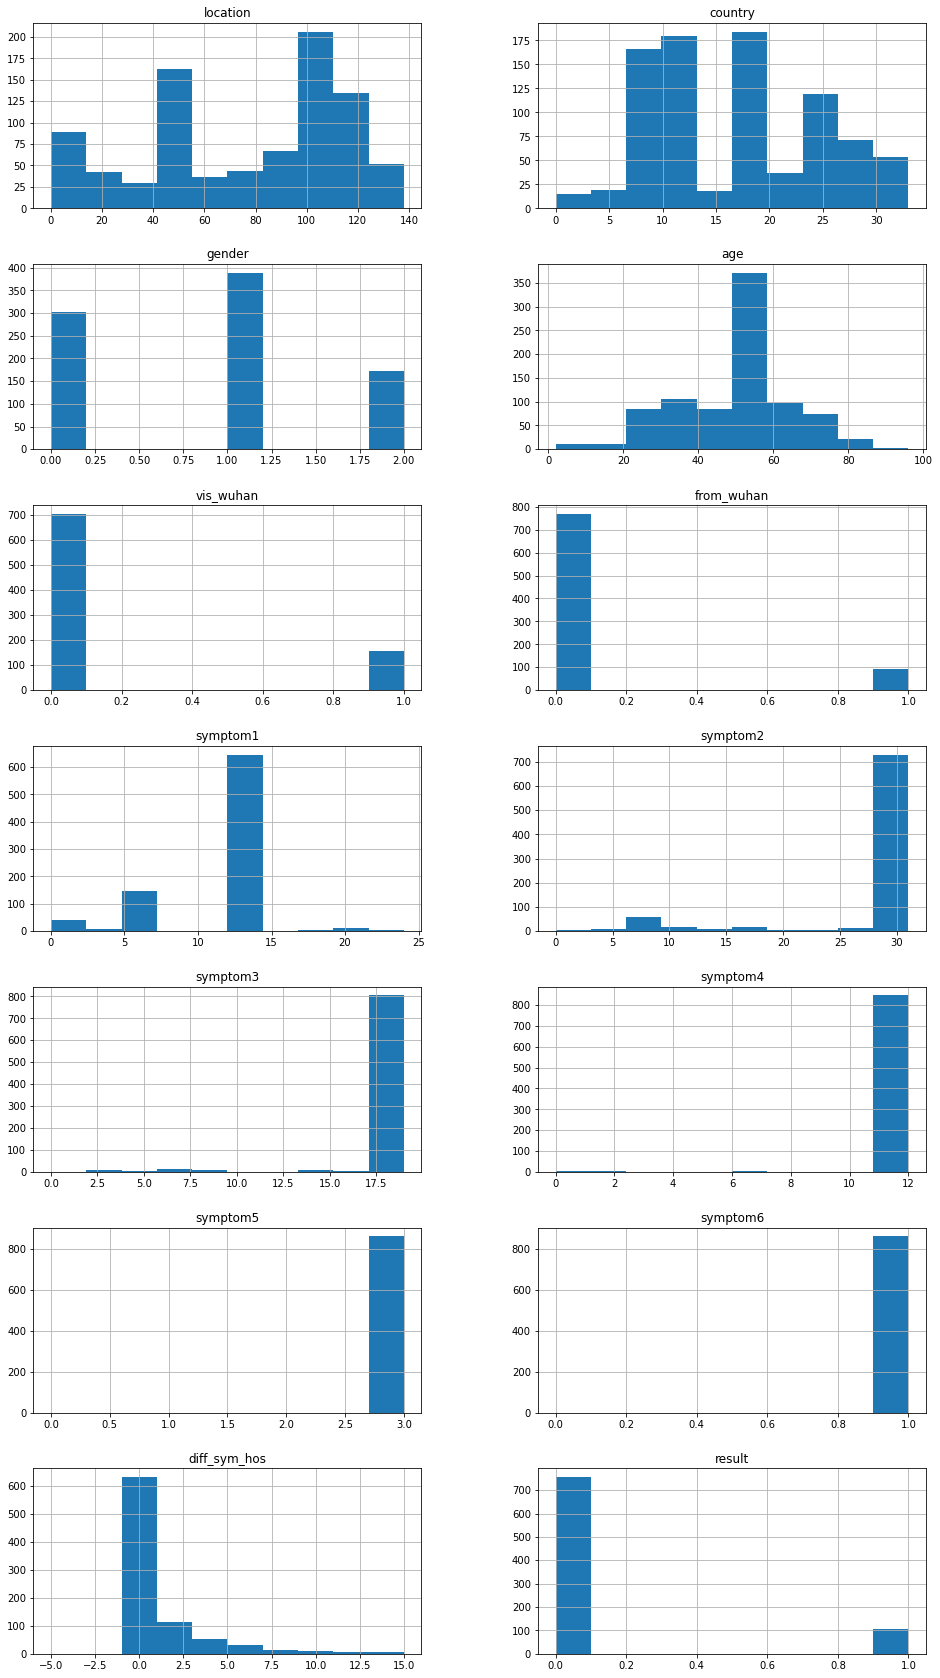

In [8]:
fig, axis = plt.subplots(7,2,figsize=(16, 30))
df.hist(ax=axis)

From the histogram of Symptoms 3 to 6, we can suspect that they are not discriminative enough. We can get clearer idea about them, if we got the frequency of each unique value in each of them.

In [9]:
cols =['symptom3','symptom4','symptom5','symptom6']
for i in range (4):
    value_counts = df[cols[i]].value_counts(sort=True)
    counts = pd.DataFrame(value_counts)
    counts_reset = counts.reset_index()
    counts_reset.columns = ['unique_value', 'counts']
    print(cols[i])
    display(counts_reset)

symptom3


,unique_value,counts
0,19,803
1,8,10
2,6,7
3,15,6
4,5,5
5,16,5
6,14,5
7,7,5
8,3,4
9,2,3


symptom4


,unique_value,counts
0,12,844
1,2,3
2,0,2
3,7,2
4,3,2
5,1,2
6,9,2
7,8,1
8,11,1
9,5,1


symptom5


,unique_value,counts
0,3,860
1,2,1
2,1,1
3,0,1


symptom6


,unique_value,counts
0,1,862
1,0,1


### Conclusion:
We can conclude from these tables, that symptom 5 and symptom 6 have no high frequency in any of their values instead of just one value, Therefore, __we can drop these columns as they are not discriminative enough__, and will not contribute in our classification. 

In [10]:
df = df.drop(columns=['symptom5', 'symptom6'])
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos,result
index,,,,,,,,,,,,
0,104,8,1,66.0,1,0,14,31,19,12,8,1
1,101,8,0,56.0,0,1,14,31,19,12,0,0
2,137,8,1,46.0,0,1,14,31,19,12,13,0
3,116,8,0,60.0,1,0,14,31,19,12,0,0
4,116,8,1,58.0,0,0,14,31,19,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,0,1
859,0,0,2,35.0,0,0,14,31,19,12,0,0
860,3,1,1,49.4,0,0,14,31,19,12,0,0


---

## CLASSIFICATION ALGORITHMS:
In this section We use KNN, Naive Bayes, and Logistic Regression To classify whether somebody will recorver or not based on the given features. In each of them, we try different preprocessing on the data, and we compare them and nominate the best model from each of the classifiers. Then, at the end, we compare the classifiers based on the nominated model of them to get the best classifier of them on this Dataset.

### Scoring Criteria:
Our Metric of knowing which model is the best is the fbeta score which is defined as:

$$\frac{((1 + \beta^2) * Precision * Recall)}{(\beta^2 * Precision + Recall)}$$

This declares that if we want equal importance of recall and precision we can use $\beta = 1$ Which is the well known f1-score.

IF $\beta = 0.5$ then we give double the weight on precision than the recall.

IF $\beta = 2$ then we give the recall double the weight of the precision.

In our case, since this is a medical dataset, and we want to decrease the number of False Negatives then we must give more weight on the recall than the precision, therefore we score based on the f2-score.

### 1. KNN:
In this Section, we use __KNN__ Classifier. We first split the data to train and test sets. Since there is no hyperparameters in this classifier except for knowing the _k_ value. We use our train data to train the model on different values of _k:_ 
1 up to $\sqrt{N} $ and compare them to get the best k. 
Comparing would be upon f2-score as explained above.

### a. Without Any Preprocessing:

In [11]:
y = df['result']
X = df.drop(columns=['result'])
X

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos
index,,,,,,,,,,,
0,104,8,1,66.0,1,0,14,31,19,12,8
1,101,8,0,56.0,0,1,14,31,19,12,0
2,137,8,1,46.0,0,1,14,31,19,12,13
3,116,8,0,60.0,1,0,14,31,19,12,0
4,116,8,1,58.0,0,0,14,31,19,12,0
...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,0
859,0,0,2,35.0,0,0,14,31,19,12,0
860,3,1,1,49.4,0,0,14,31,19,12,0


__Train/Test Splitting:__

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.1,random_state=10)

__Training on different values of K to get the best Value of K:__

In [13]:
rec = list()
f2 = list()

for i in range (1,int(np.sqrt(len(X)))):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    y_pred_prob = knn.predict_proba(X1_test)
    y_pred_prob = y_pred_prob[:, 1]
    y_pred = knn.predict(X1_test)
    rec.append(recall_score(y1_test, y_pred))
    f2.append(fbeta_score(y1_test, y_pred, beta=2))

__Plotting F2-Score and Recall on different Values of K:__

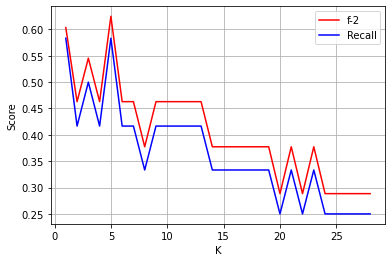

In [14]:
plt.plot(range(1,int(np.sqrt(len(X)))), f2, 'r',label="f-2")
plt.plot(range(1,int(np.sqrt(len(X)))), rec, 'b',label ="Recall")
plt.ylabel("Score")
plt.xlabel("K")
plt.legend()
plt.grid()
plt.show()

In [15]:
k=f2.index(max(f2))+1
k

5

__Training the Model on the best value of K:__

In [16]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X1_train, y1_train)
y_pred_prob = knn.predict_proba(X1_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred = knn.predict(X1_test)

__Displaying Scoring Metrics of the Model:__

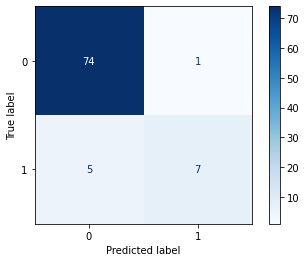

In [17]:
disp = plot_confusion_matrix(knn, X1_test, y1_test, cmap ='Blues', values_format='.3g')

In [18]:
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        75
           1       0.88      0.58      0.70        12

    accuracy                           0.93        87
   macro avg       0.91      0.79      0.83        87
weighted avg       0.93      0.93      0.93        87



In [19]:
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_prob)
Kf2_0 = fbeta_score(y1_test, y_pred, beta=2)
Kr0 = recall_score(y1_test, y_pred)
Kp0 = precision_score(y1_test, y_pred)
Ka0 = roc_auc_score(y1_test,y_pred_prob)
print("F2 Score: ", Kf2_0)

F2 Score:  0.6250000000000001


Area under ROC:  0.9444444444444444


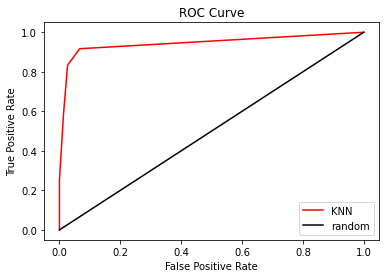

In [20]:
print("Area under ROC: ",roc_auc_score(y1_test, y_pred_prob))
plt.plot(fpr, tpr,'r-',label = 'KNN')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### b. With Normalization:

In [21]:
y = df['result']
X = df.drop(columns=['result'])

In [22]:
scaler = MinMaxScaler(feature_range = (0,1)) 
scaled_values = scaler.fit_transform(X) 
X.loc[:,:] = scaled_values
X

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos
index,,,,,,,,,,,
0,0.753623,0.242424,0.5,0.680851,1.0,0.0,0.583333,1.0,1.0,1.0,0.65
1,0.731884,0.242424,0.0,0.574468,0.0,1.0,0.583333,1.0,1.0,1.0,0.25
2,0.992754,0.242424,0.5,0.468085,0.0,1.0,0.583333,1.0,1.0,1.0,0.90
3,0.840580,0.242424,0.0,0.617021,1.0,0.0,0.583333,1.0,1.0,1.0,0.25
4,0.840580,0.242424,0.5,0.595745,0.0,0.0,0.583333,1.0,1.0,1.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...
858,0.347826,0.090909,1.0,0.234043,0.0,0.0,0.583333,1.0,1.0,1.0,0.25
859,0.000000,0.000000,1.0,0.351064,0.0,0.0,0.583333,1.0,1.0,1.0,0.25
860,0.021739,0.030303,0.5,0.504255,0.0,0.0,0.583333,1.0,1.0,1.0,0.25


__Train/Test Splitting:__

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.1,random_state=10)

__Training on different values of K to get the best Value of K:__

In [24]:
f2 = list()
rec = list()
for i in range (1,int(np.sqrt(len(X)))):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    y_pred_prob = knn.predict_proba(X1_test)
    y_pred_prob = y_pred_prob[:, 1]
    y_pred = knn.predict(X1_test)
    rec.append(recall_score(y1_test, y_pred))
    f2.append(fbeta_score(y1_test, y_pred, beta=2))

__Plotting F2-Score and Recall on different Values of K:__

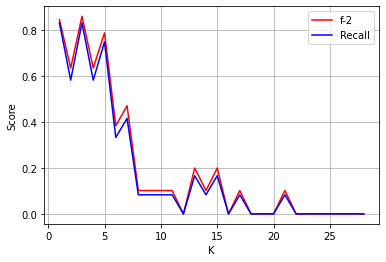

In [25]:
plt.plot(range(1,int(np.sqrt(len(X)))), f2, 'r',label="f-2")
plt.plot(range(1,int(np.sqrt(len(X)))), rec, 'b',label ="Recall")
plt.ylabel("Score")
plt.xlabel("K")
plt.legend()
plt.grid()
plt.show()

In [26]:
k=f2.index(max(f2))+1
k

3

__Training the Model on the best value of K:__

In [27]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X1_train, y1_train)
y_pred_prob = knn.predict_proba(X1_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred = knn.predict(X1_test)

__Displaying Scoring Metrics of the Model:__

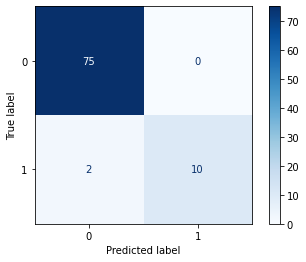

In [28]:
disp = plot_confusion_matrix(knn, X1_test, y1_test, cmap ='Blues', values_format='.3g')

In [29]:
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.83      0.91        12

    accuracy                           0.98        87
   macro avg       0.99      0.92      0.95        87
weighted avg       0.98      0.98      0.98        87



In [30]:
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_prob)
Kf2_1 = fbeta_score(y1_test, y_pred, beta=2)
Kr1 = recall_score(y1_test, y_pred)
Kp1 = precision_score(y1_test, y_pred)
Ka1 = roc_auc_score(y1_test,y_pred_prob)
print("F2 Score: ", Kf2_1)

F2 Score:  0.8620689655172415


Area under ROC:  0.9100000000000001


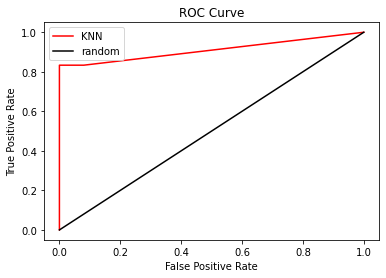

In [31]:
print("Area under ROC: ",roc_auc_score(y1_test, y_pred_prob))
plt.plot(fpr, tpr,'r-',label = 'KNN')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

### b. With One-Hot Encoding:

In [32]:
y = df['result']
X = df.drop(columns=['result'])

In [33]:
var=pd.get_dummies(X,columns =	["gender","location","country"])
X=pd.DataFrame(data=var)
X

,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos,gender_0,gender_1,...,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33
index,,,,,,,,,,,,,,,,,,,,,
0,66.0,1,0,14,31,19,12,8,0,1,...,0,0,0,0,0,0,0,0,0,0
1,56.0,0,1,14,31,19,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,46.0,0,1,14,31,19,12,13,0,1,...,0,0,0,0,0,0,0,0,0,0
3,60.0,1,0,14,31,19,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,14,31,19,12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,24.0,0,0,14,31,19,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,35.0,0,0,14,31,19,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,49.4,0,0,14,31,19,12,0,0,1,...,0,0,0,0,0,0,0,0,0,0


__Train/Test Split:__

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.1,random_state=10)

__Training on different values of K to get the best Value of K:__

In [35]:
f2 = list()
rec = list()
for i in range (1,int(np.sqrt(len(X)))):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    y_pred_prob = knn.predict_proba(X1_test)
    y_pred_prob = y_pred_prob[:, 1]
    y_pred = knn.predict(X1_test)
    rec.append(recall_score(y1_test, y_pred))
    f2.append(fbeta_score(y1_test, y_pred, beta=2))

__Plotting F2-Score and Recall on different Values of K:__

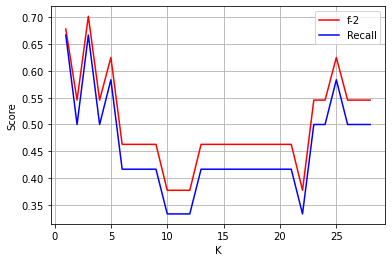

In [36]:
plt.plot(range(1,int(np.sqrt(len(X)))), f2, 'r',label="f-2")
plt.plot(range(1,int(np.sqrt(len(X)))), rec, 'b',label ="Recall")
plt.ylabel("Score")
plt.xlabel("K")
plt.legend()
plt.grid()
plt.show()

In [37]:
k=f2.index(max(f2))+1
k

3

__Training the Model on the best value of K:__

In [38]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X1_train, y1_train)
y_pred_prob = knn.predict_proba(X1_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred = knn.predict(X1_test)

__Displaying Scoring Metrics of the Model:__

C:\Users\steve\miniconda3\envs\mlpr\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


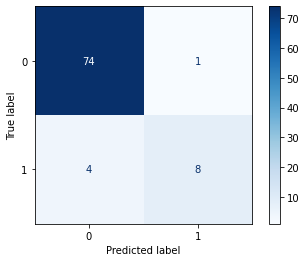

In [39]:
disp = plot_confusion_matrix(knn, X1_test, y1_test, cmap ='Blues', values_format='.3g')

In [40]:
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        75
           1       0.89      0.67      0.76        12

    accuracy                           0.94        87
   macro avg       0.92      0.83      0.86        87
weighted avg       0.94      0.94      0.94        87



In [41]:
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_prob)
Kf2_2 = fbeta_score(y1_test, y_pred, beta=2)
Kr2 = recall_score(y1_test, y_pred)
Kp2 = precision_score(y1_test, y_pred)
Ka2 = roc_auc_score(y1_test,y_pred_prob)
print("F2 Score: ", Kf2_2)

F2 Score:  0.7017543859649122


Area under ROC:  0.9416666666666665


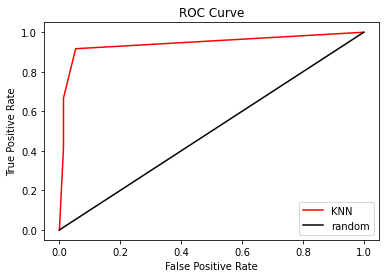

In [42]:
print("Area under ROC: ",roc_auc_score(y1_test, y_pred_prob))
plt.plot(fpr, tpr,'r-',label = 'KNN')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

###  c.With defining Feature Types as Categorical, instead of One-Hot:

In [43]:
y = df['result']
X = df.drop(columns=['result'])

In [44]:
X.location = X.location.astype('category')
X.gender = X.gender.astype('category')
X.country = X.country.astype('category')
X

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos
index,,,,,,,,,,,
0,104,8,1,66.0,1,0,14,31,19,12,8
1,101,8,0,56.0,0,1,14,31,19,12,0
2,137,8,1,46.0,0,1,14,31,19,12,13
3,116,8,0,60.0,1,0,14,31,19,12,0
4,116,8,1,58.0,0,0,14,31,19,12,0
...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,0
859,0,0,2,35.0,0,0,14,31,19,12,0
860,3,1,1,49.4,0,0,14,31,19,12,0


__Train/Test Split:__

In [45]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.1,random_state=10)

__Training on different values of K to get the best Value of K:__

In [46]:
f2 = list()
rec = list()
for i in range (1,int(np.sqrt(len(X)))):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    y_pred_prob = knn.predict_proba(X1_test)
    y_pred_prob = y_pred_prob[:, 1]
    y_pred = knn.predict(X1_test)
    rec.append(recall_score(y1_test, y_pred))
    f2.append(fbeta_score(y1_test, y_pred, beta=2))

__Plotting F2-Score and Recall on different Values of K:__

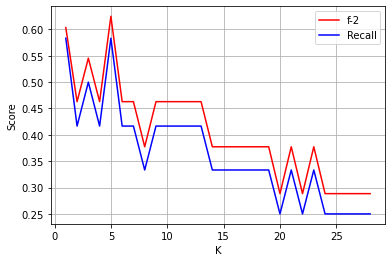

In [47]:
plt.plot(range(1,int(np.sqrt(len(X)))), f2, 'r',label="f-2")
plt.plot(range(1,int(np.sqrt(len(X)))), rec, 'b',label ="Recall")
plt.ylabel("Score")
plt.xlabel("K")
plt.legend()
plt.grid()
plt.show()

In [48]:
k=f2.index(max(f2))+1
k

5

__Training the Model on the best value of K:__

In [49]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X1_train, y1_train)
y_pred_prob = knn.predict_proba(X1_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred = knn.predict(X1_test)

__Displaying Scoring Metrics of the Model:__

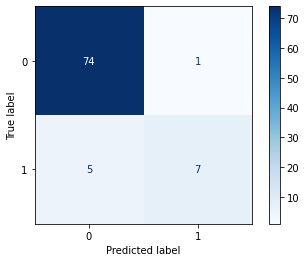

In [50]:
disp = plot_confusion_matrix(knn, X1_test, y1_test, cmap ='Blues', values_format='.3g')

In [51]:
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        75
           1       0.88      0.58      0.70        12

    accuracy                           0.93        87
   macro avg       0.91      0.79      0.83        87
weighted avg       0.93      0.93      0.93        87



In [52]:
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_prob)
Kf2_3 = fbeta_score(y1_test, y_pred, beta=2)
Kr3 = recall_score(y1_test, y_pred)
Kp3 = precision_score(y1_test, y_pred)
Ka3 = roc_auc_score(y1_test,y_pred_prob)
print("F2 Score: ", Kf2_3)

F2 Score:  0.6250000000000001


Area under ROC:  0.9444444444444444


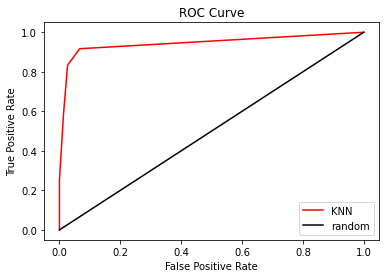

In [53]:
print("Area under ROC: ",roc_auc_score(y1_test, y_pred_prob))
plt.plot(fpr, tpr,'r-',label = 'KNN')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### d. One-Hot on Categorical, and normalizing Numerical features:

In [54]:
y = df['result']
X = df.drop(columns=['result'])

In [55]:
var=pd.get_dummies(X,columns =	["gender","location","country"])
X=pd.DataFrame(data=var)

scaler = MinMaxScaler(feature_range = (0,1)) 
scaled_values = scaler.fit_transform(X) 
X.loc[:,:] = scaled_values
X

,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos,gender_0,gender_1,...,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33
index,,,,,,,,,,,,,,,,,,,,,
0,0.680851,1.0,0.0,0.583333,1.0,1.0,1.0,0.65,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.574468,0.0,1.0,0.583333,1.0,1.0,1.0,0.25,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.468085,0.0,1.0,0.583333,1.0,1.0,1.0,0.90,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.617021,1.0,0.0,0.583333,1.0,1.0,1.0,0.25,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.595745,0.0,0.0,0.583333,1.0,1.0,1.0,0.25,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.234043,0.0,0.0,0.583333,1.0,1.0,1.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
859,0.351064,0.0,0.0,0.583333,1.0,1.0,1.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.504255,0.0,0.0,0.583333,1.0,1.0,1.0,0.25,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__Train/Test Split:__

In [56]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.1,random_state=10)

__Training on different values of K to get the best Value of K:__

In [57]:
f2 = list()
rec = list()
for i in range (1,int(np.sqrt(len(X)))):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    y_pred_prob = knn.predict_proba(X1_test)
    y_pred_prob = y_pred_prob[:, 1]
    y_pred = knn.predict(X1_test)
    rec.append(recall_score(y1_test, y_pred))
    f2.append(fbeta_score(y1_test, y_pred, beta=2))

__Plotting F2-Score and Recall on different Values of K:__

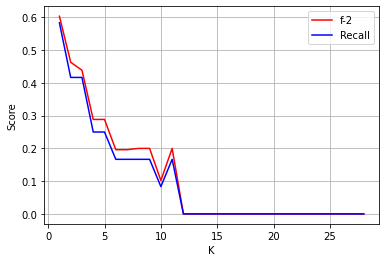

In [58]:
plt.plot(range(1,int(np.sqrt(len(X)))), f2, 'r',label="f-2")
plt.plot(range(1,int(np.sqrt(len(X)))), rec, 'b',label ="Recall")
plt.ylabel("Score")
plt.xlabel("K")
plt.legend()
plt.grid()
plt.show()

In [59]:
k=f2.index(max(f2))+1
k

1

__Training the Model on the best value of K:__

In [60]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X1_train, y1_train)
y_pred_prob = knn.predict_proba(X1_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred = knn.predict(X1_test)

__Displaying Scoring Metrics of the Model:__

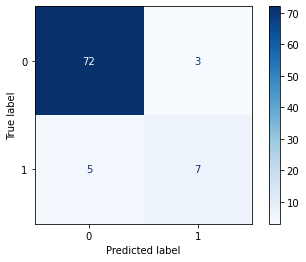

In [61]:
disp = plot_confusion_matrix(knn, X1_test, y1_test, cmap ='Blues', values_format='.3g')

In [62]:
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        75
           1       0.70      0.58      0.64        12

    accuracy                           0.91        87
   macro avg       0.82      0.77      0.79        87
weighted avg       0.90      0.91      0.90        87



In [63]:
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_prob)
Kf2_4 = fbeta_score(y1_test, y_pred, beta=2)
Kr4 = recall_score(y1_test, y_pred)
Kp4 = precision_score(y1_test, y_pred)
Ka4 = roc_auc_score(y1_test,y_pred_prob)
print("F2 Score: ", Kf2_4)

F2 Score:  0.6034482758620691


Area under ROC:  0.7716666666666667


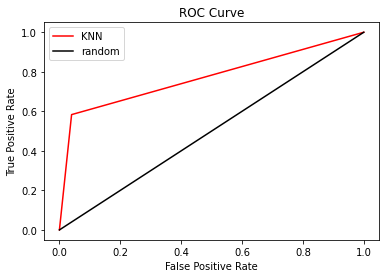

In [64]:
print("Area under ROC: ",roc_auc_score(y1_test, y_pred_prob))
plt.plot(fpr, tpr,'r-',label = 'KNN')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

### e. Without Normalizing Age:
Since we suspect that age has a better importance, therefore, it can have higher weight in distance calculations:

In [65]:
y = df['result']
X = df.drop(columns=['result'])
age = X['age']
X1 = X.drop(columns=['age'])

In [66]:
scaler = MinMaxScaler(feature_range = (0,1)) 
scaled_values = scaler.fit_transform(X1) 
X1.loc[:,:] = scaled_values

age = X['age']
X1['age'] = age
X1

,location,country,gender,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos,age
index,,,,,,,,,,,
0,0.753623,0.242424,0.5,1.0,0.0,0.583333,1.0,1.0,1.0,0.65,66.0
1,0.731884,0.242424,0.0,0.0,1.0,0.583333,1.0,1.0,1.0,0.25,56.0
2,0.992754,0.242424,0.5,0.0,1.0,0.583333,1.0,1.0,1.0,0.90,46.0
3,0.840580,0.242424,0.0,1.0,0.0,0.583333,1.0,1.0,1.0,0.25,60.0
4,0.840580,0.242424,0.5,0.0,0.0,0.583333,1.0,1.0,1.0,0.25,58.0
...,...,...,...,...,...,...,...,...,...,...,...
858,0.347826,0.090909,1.0,0.0,0.0,0.583333,1.0,1.0,1.0,0.25,24.0
859,0.000000,0.000000,1.0,0.0,0.0,0.583333,1.0,1.0,1.0,0.25,35.0
860,0.021739,0.030303,0.5,0.0,0.0,0.583333,1.0,1.0,1.0,0.25,49.4


__Train/Test Split:__

In [67]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size=0.1,random_state=10)

__Training on different values of K to get the best Value of K:__

In [68]:
f2 = list()
rec = list()
for i in range (1,int(np.sqrt(len(X)))):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)    
    y_pred_prob = knn.predict_proba(X1_test)
    y_pred_prob = y_pred_prob[:, 1]
    y_pred = knn.predict(X1_test)
    rec.append(recall_score(y1_test, y_pred))
    f2.append(fbeta_score(y1_test, y_pred, beta=2))

__Plotting F2-Score and Recall on different Values of K:__

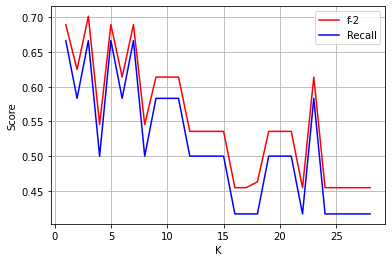

In [69]:
plt.plot(range(1,int(np.sqrt(len(X)))), f2, 'r',label="f-2")
plt.plot(range(1,int(np.sqrt(len(X)))), rec, 'b',label ="Recall")
plt.ylabel("Score")
plt.xlabel("K")
plt.legend()
plt.grid()
plt.show()

In [70]:
k=f2.index(max(f2))+1
k

3

__Training the Model on the best value of K:__

In [71]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X1_train, y1_train)
y_pred_prob = knn.predict_proba(X1_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred = knn.predict(X1_test)

__Displaying Scoring Metrics of the Model:__

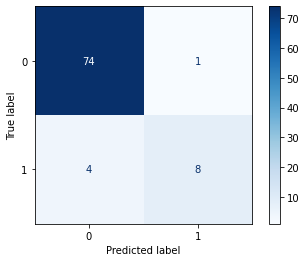

In [72]:
disp = plot_confusion_matrix(knn, X1_test, y1_test, cmap ='Blues', values_format='.3g')

In [73]:
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        75
           1       0.89      0.67      0.76        12

    accuracy                           0.94        87
   macro avg       0.92      0.83      0.86        87
weighted avg       0.94      0.94      0.94        87



In [74]:
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_prob)
Kf2_5 = fbeta_score(y1_test, y_pred, beta=2)
Kr5 = recall_score(y1_test, y_pred)
Kp5 = precision_score(y1_test, y_pred)
Ka5 = roc_auc_score(y1_test,y_pred_prob)
print("F2 Score: ", Kf2_5)

F2 Score:  0.7017543859649122


Area under ROC:  0.9372222222222222


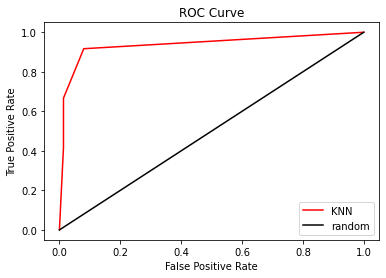

In [75]:
print("Area under ROC: ",roc_auc_score(y1_test, y_pred_prob))
plt.plot(fpr, tpr,'r-',label = 'KNN')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### f. With Gender Smoothing and Normalization:

By substituting the Gender = "2" with the median of Gender of its label.

In [76]:
df1, df2 = [x for _, x in df.groupby(df['result'] ==0)]
df['gender'].value_counts()

1    389
0    302
2    172
Name: gender, dtype: int64

In [77]:
df1['gender'].median()

1.0

In [78]:
df2['gender'].median()

1.0

In [79]:
c_df = df
c_df['gender'] = df['gender'].replace(2,1)

c_df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos,result
index,,,,,,,,,,,,
0,104,8,1,66.0,1,0,14,31,19,12,8,1
1,101,8,0,56.0,0,1,14,31,19,12,0,0
2,137,8,1,46.0,0,1,14,31,19,12,13,0
3,116,8,0,60.0,1,0,14,31,19,12,0,0
4,116,8,1,58.0,0,0,14,31,19,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,1,24.0,0,0,14,31,19,12,0,1
859,0,0,1,35.0,0,0,14,31,19,12,0,0
860,3,1,1,49.4,0,0,14,31,19,12,0,0


In [80]:
y = c_df['result']
X = c_df.drop(columns=['result'])

In [81]:
scaler = MinMaxScaler(feature_range = (0,1)) 
scaled_values = scaler.fit_transform(X) 
X.loc[:,:] = scaled_values
X

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos
index,,,,,,,,,,,
0,0.753623,0.242424,1.0,0.680851,1.0,0.0,0.583333,1.0,1.0,1.0,0.65
1,0.731884,0.242424,0.0,0.574468,0.0,1.0,0.583333,1.0,1.0,1.0,0.25
2,0.992754,0.242424,1.0,0.468085,0.0,1.0,0.583333,1.0,1.0,1.0,0.90
3,0.840580,0.242424,0.0,0.617021,1.0,0.0,0.583333,1.0,1.0,1.0,0.25
4,0.840580,0.242424,1.0,0.595745,0.0,0.0,0.583333,1.0,1.0,1.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...
858,0.347826,0.090909,1.0,0.234043,0.0,0.0,0.583333,1.0,1.0,1.0,0.25
859,0.000000,0.000000,1.0,0.351064,0.0,0.0,0.583333,1.0,1.0,1.0,0.25
860,0.021739,0.030303,1.0,0.504255,0.0,0.0,0.583333,1.0,1.0,1.0,0.25


In [82]:
print(X['gender'].value_counts())
print(df['gender'].value_counts())

1.0    561
0.0    302
Name: gender, dtype: int64
1    561
0    302
Name: gender, dtype: int64


__Train/Test Split:__

In [83]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.1,random_state=10)

__Training on different values of K to get the best Value of K:__

In [84]:
f2 = list()
rec = list()
for i in range (1,int(np.sqrt(len(df)))):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    y_pred_prob = knn.predict_proba(X1_test)
    y_pred_prob = y_pred_prob[:, 1]
    y_pred = knn.predict(X1_test)
    rec.append(recall_score(y1_test, y_pred))
    f2.append(fbeta_score(y1_test, y_pred, beta=2))

__Plotting F2-Score and Recall on different Values of K:__

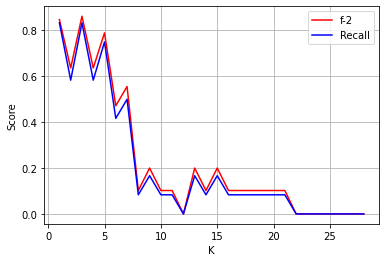

In [85]:
plt.plot(range(1,29), f2, 'r',label="f-2")
plt.plot(range(1,29), rec, 'b',label ="Recall")
plt.ylabel("Score")
plt.xlabel("K")
plt.legend()
plt.grid()
plt.show()

In [86]:
k=f2.index(max(f2))+1
k

3

__Training the Model on the best value of K:__

In [87]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X1_train, y1_train)
y_pred_prob = knn.predict_proba(X1_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred = knn.predict(X1_test)

__Displaying Scoring Metrics of the Model:__

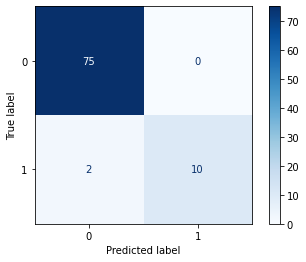

In [88]:
disp = plot_confusion_matrix(knn, X1_test, y1_test, cmap ='Blues', values_format='.3g')

In [89]:
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.83      0.91        12

    accuracy                           0.98        87
   macro avg       0.99      0.92      0.95        87
weighted avg       0.98      0.98      0.98        87



In [90]:
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_prob)
Kf2_6 = fbeta_score(y1_test, y_pred, beta=2)
Kr6 = recall_score(y1_test, y_pred)
Kp6 = precision_score(y1_test, y_pred)
Ka6 = roc_auc_score(y1_test,y_pred_prob)
print("F2 Score: ", Kf2_6)

F2 Score:  0.8620689655172415


Area under ROC:  0.9100000000000001


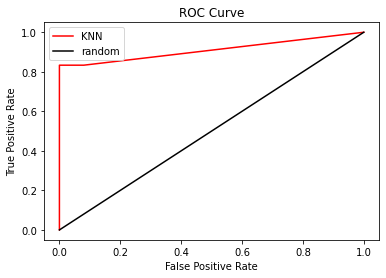

In [91]:
print("Area under ROC: ",roc_auc_score(y1_test, y_pred_prob))
plt.plot(fpr, tpr,'r-',label = 'KNN')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Comparison Between Different Preprocessings:

and nominating the best model based on the highest f2-score of them.

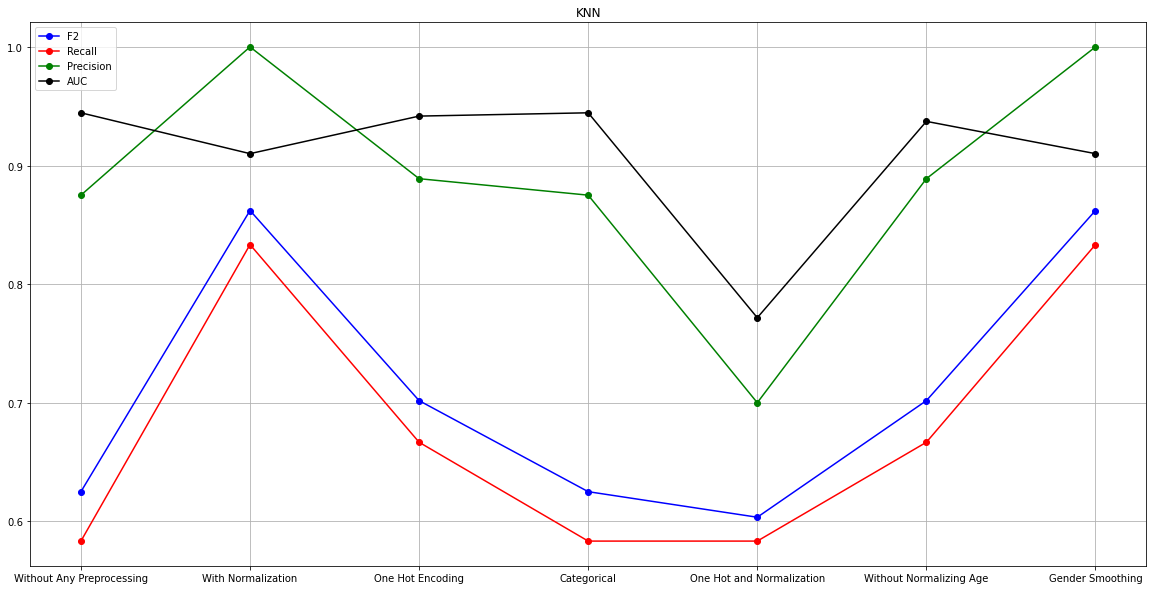

In [92]:
fig = plt.figure(figsize=(20,10))
plt.plot(['Without Any Preprocessing','With Normalization', 'One Hot Encoding', 'Categorical', 'One Hot and Normalization', 'Without Normalizing Age', 'Gender Smoothing'],[Kf2_0,Kf2_1,Kf2_2,Kf2_3,Kf2_4,Kf2_5,Kf2_6],color='b',marker='o',label ='F2')
plt.plot(['Without Any Preprocessing','With Normalization', 'One Hot Encoding', 'Categorical', 'One Hot and Normalization', 'Without Normalizing Age', 'Gender Smoothing'],[Kr0,Kr1,Kr2,Kr3,Kr4,Kr5,Kr6],color='r',marker='o',label ='Recall')
plt.plot(['Without Any Preprocessing','With Normalization', 'One Hot Encoding', 'Categorical', 'One Hot and Normalization', 'Without Normalizing Age', 'Gender Smoothing'],[Kp0,Kp1,Kp2,Kp3,Kp4,Kp5,Kp6],color='g',marker='o',label ='Precision')
plt.plot(['Without Any Preprocessing','With Normalization', 'One Hot Encoding', 'Categorical', 'One Hot and Normalization', 'Without Normalizing Age', 'Gender Smoothing'],[Ka0,Ka1,Ka2,Ka3,Ka4,Ka5,Ka6],color='black',marker='o',label ='AUC')



plt.title('KNN')
plt.legend()
plt.grid()
plt.show()

### Conclusions of KNN:

Based on the above graph, we can conclude that the best model is with normalization only, so when we are comparing different classifiers, we will compare with this model as a representative of the KNN.

---

### 2. Naive Bayes:
In this Section, we use __Gaussian NB__ Classifier. We first split the data to train, validation and test sets as 70%, 15% and 15% respectively. 

First of all, we do a one-hot encoding on the data, which is a must to have better gaussian distributions.

We use Gridsearchcv which does the job of selecting the best hyperparameters for our classifier. We have 2 hyperparameters. 
* $ \alpha: $ which is el ratio of the priors, which will give an importance of a class than the other.
* $ var-smoothing: $ responsible for distribution's variance, which can widen the bell curve, which means that it would allow more samples that are further than its mean to pass.

The scoring Criteria for the Grid Search Cross Validation is the f2-Score, as mentioned above.

### a. Without Hyperparameter Tuning:

In [93]:
op_df = df
var = pd.get_dummies(op_df,columns =["gender","location","country"])
op_df = pd.DataFrame(data=var)
op_df

,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos,result,gender_0,...,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33
index,,,,,,,,,,,,,,,,,,,,,
0,66.0,1,0,14,31,19,12,8,1,0,...,0,0,0,0,0,0,0,0,0,0
1,56.0,0,1,14,31,19,12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,46.0,0,1,14,31,19,12,13,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,1,0,14,31,19,12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,14,31,19,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,24.0,0,0,14,31,19,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
859,35.0,0,0,14,31,19,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,49.4,0,0,14,31,19,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
y = op_df["result"]
x= op_df.drop(columns=["result"])

__Train/Test Split:__

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10,shuffle=True)

__Training the Model:__

In [96]:
clf = GaussianNB()
clf.fit(X_train,y_train)

y_pred_prob = clf.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred = clf.predict(X_test)

__Displaying Scoring Metrics of the Model:__

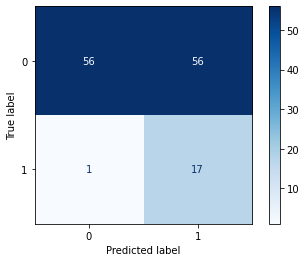

In [97]:
disp = plot_confusion_matrix(clf, X_test, y_test, cmap ='Blues', values_format='.3g')

In [98]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66       112
           1       0.23      0.94      0.37        18

    accuracy                           0.56       130
   macro avg       0.61      0.72      0.52       130
weighted avg       0.88      0.56      0.62       130



In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
Nf2_0 = fbeta_score(y_test, y_pred, beta=2)
NP0 =precision_score(y_test, y_pred)
Nauc0=roc_auc_score(y_test, y_pred_prob)
NR0 =recall_score(y_test, y_pred)
print("F2 Score: ", Nf2_0)

F2 Score:  0.5862068965517241


Area under ROC:  0.7222222222222222


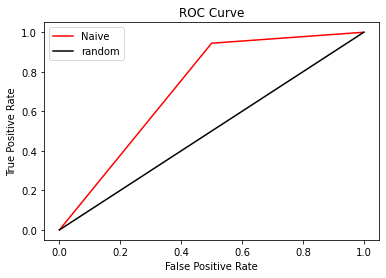

In [100]:
print("Area under ROC: ",Nauc0)
plt.plot(fpr, tpr,'r-',label = 'Naive')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### b. With Hyperparameter Tuning:

__Train/Test Split:__

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=10,shuffle=True)

__Validation to Get the Best Hyperparameters:__

In [102]:
clf = GaussianNB()
smoothing_range = np.logspace(9,-9, num=100)
probs = [[0.5,0.5],[0.0,1.0],[0.05,0.95],[0.1,0.9],[0.15,0.85],[0.2,0.8],[0.25,0.75],[0.3,0.7],[0.35,0.65],[0.4,0.6],[0.45,0.55],[0.55,0.45],[0.6,0.4],[0.65,0.35],[0.7,0.3],[0.75,0.25],[0.8,0.2],[0.85,0.15],[0.9,0.1],[0.95,0.05],[1,0]]
param_grid = [    
    {
    'priors' : probs,
    'var_smoothing' : smoothing_range
    }
]

f2 = make_scorer(fbeta_score, beta=2)

grid = GridSearchCV(clf, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring=f2)

best_clf = grid.fit(X_train, y_train)

clf = best_clf.best_estimator_

Fitting 5 folds for each of 2100 candidates, totalling 10500 fits


__Training a Model with the best Hyperparameters:__

In [103]:
clf.fit(X_train,y_train)

GaussianNB(priors=[0.5, 0.5], var_smoothing=1000000000.0)

In [104]:
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred = clf.predict(X_test)

__Displaying Scoring Metrics of the Model:__

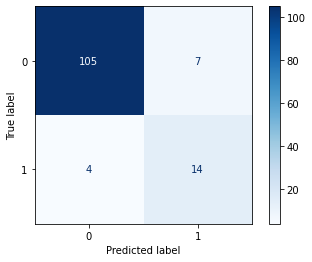

In [105]:
disp = plot_confusion_matrix(clf, X_test, y_test, cmap ='Blues', values_format='.3g')

In [106]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       112
           1       0.67      0.78      0.72        18

    accuracy                           0.92       130
   macro avg       0.81      0.86      0.83       130
weighted avg       0.92      0.92      0.92       130



In [107]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
Nf2_1 = fbeta_score(y_test, y_pred, beta=2)
NP1 =precision_score(y_test, y_pred)
Nauc1=roc_auc_score(y_test, y_pred_prob)
NR1 =recall_score(y_test, y_pred)
print("F2 Score: ", Nf2_1)

F2 Score:  0.7526881720430108


Area under ROC:  0.8849206349206349


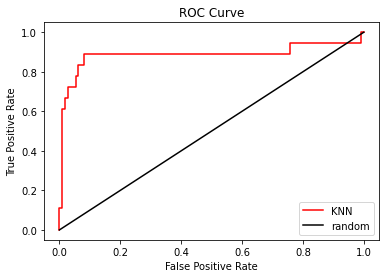

In [108]:
print("Area under ROC: ",Nauc1)
plt.plot(fpr, tpr,'r-',label = 'KNN')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Comparison between without and with Hyperparameters:

To see the effect of hyperparameter tuning, and nominating the best model of them.

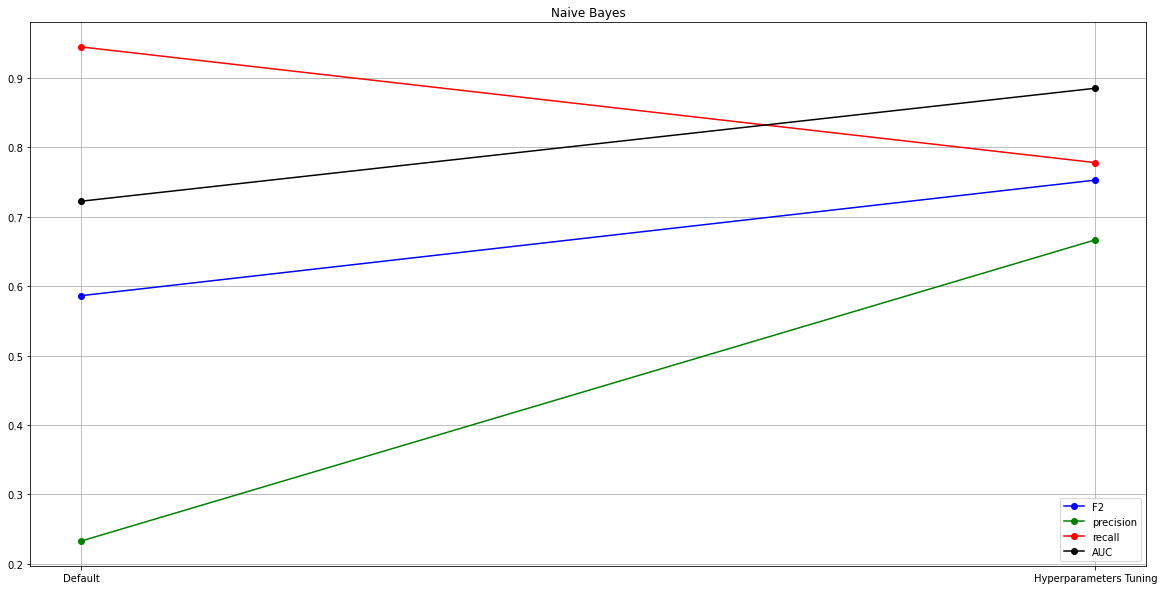

In [109]:
fig = plt.figure(figsize=(20,10))
plt.plot(['Default', 'Hyperparameters Tuning'],[Nf2_0,Nf2_1],color='b',marker='o',label ='F2')
plt.plot(['Default', 'Hyperparameters Tuning'],[NP0,NP1],color='g',marker='o',label ='precision')
plt.plot(['Default', 'Hyperparameters Tuning'],[NR0,NR1],color='r',marker='o',label ='recall')
plt.plot(['Default', 'Hyperparameters Tuning'],[Nauc0,Nauc1],color='black',marker='o',label ='AUC')

plt.title('Naive Bayes')
plt.legend()
plt.grid()
plt.show()


### Conclusions of Naive Bayes:

Based on the above graph, we can conclude that Hyperparameter Tuning affected the f2-Score positevely, so when we are comparing different classifiers, we will compare with the model with Hyperparameter tuning as a representative of the Naive Bayes.

----

### 3. Logistic Regression:
In this Section, we use __LogisticRegression__ Classifier. We first split the data to train, validation and test sets as 70%, 15% and 15% respectively. 

First of all, we do scaling on the data, which is prefered to as we use gradient decient so all featues have mean=0 & variance =1. when all feature on same scale then they will get updated with same speed to reach optimal value.

We use Gridsearchcv which does the job of selecting the best hyperparameters for our classifier. We have 2 hyperparameters. 
* $ C : $ reglization term to reduce overfitting.
* $ class$_$weight :$  class weight give an importance of a class have lower frequency.

The scoring Criteria for the Grid Search Cross Validation is the f2-Score, as mentioned above.

### a. Without Hyperparameter Tuning:

__Train/Test Split:__

In [110]:
y = df['result']
X = df.drop(columns=['result'])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15,random_state=10)

In [112]:
scal = StandardScaler()
X_train1 = scal.fit_transform(X_train)
X_test1 = scal.transform(X_test)

__Training the Model:__

In [113]:
clf = linear_model.LogisticRegression()
clf.fit(X_train1, y_train)

y_pred_prob = clf.predict_proba(X_test1)
y_pred_prob = y_pred_prob[:,1]
y_pred = clf.predict(X_test1)

__Displaying Scoring Metrics of the Model:__

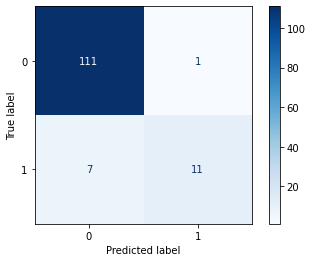

In [114]:
disp = plot_confusion_matrix(clf, X_test1, y_test, cmap ='Blues', values_format='.3g')

In [115]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       112
           1       0.92      0.61      0.73        18

    accuracy                           0.94       130
   macro avg       0.93      0.80      0.85       130
weighted avg       0.94      0.94      0.93       130



In [116]:
f2_1 = fbeta_score(y_test, y_pred, beta=2)
R1 =recall_score(y_test, y_pred)
P1 =precision_score(y_test, y_pred)
print("F2 Score: ", f2_1)

F2 Score:  0.6547619047619048


In [117]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

AUC on test data = 0.936012


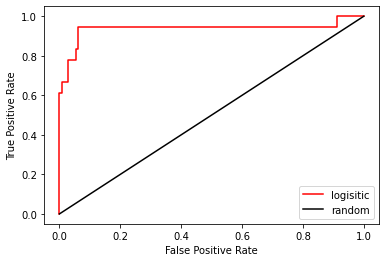

In [118]:
plt.plot(fpr, tpr,'r-',label = 'logisitic')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
auc1=roc_auc_score( y_test, y_pred_prob)
print("AUC on test data = %f" % auc1)
plt.show()

### b. With Hyperparameter Tuning: 

__Validation to Get the Best Hyperparameters:__

In [119]:
y = df['result']
X = df.drop(columns=['result'])

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15,random_state=10)
scal = StandardScaler()
X_train1 = scal.fit_transform(X_train)
X_test1 = scal.transform(X_test)

In [121]:
clf = linear_model.LogisticRegression(max_iter = 3000)

weights= np.linspace(0.0,0.99,100)

W=[{0:x, 1:1.0-x} for x in weights]

param_grid = [    
    {
    'C' : np.logspace(-4, 4, 50),
    'class_weight' : W
    }
]
f2 = make_scorer(fbeta_score, beta=2)
    

clf = GridSearchCV(clf, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring=f2)

best_clf = clf.fit(X_train1,y_train)

clf=clf.best_estimator_

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


__Training a Model with the best Hyperparameters:__

In [122]:
clf.fit(X_train1, y_train)

LogisticRegression(C=1.7575106248547894, class_weight={0: 0.3, 1: 0.7},
                   max_iter=3000)

In [123]:
y_pred = clf.predict(X_test1)
y_pred_prob = clf.predict_proba(X_test1)
y_pred_prob =y_pred_prob[:,1]

__Displaying Scoring Metrics of the Model:__

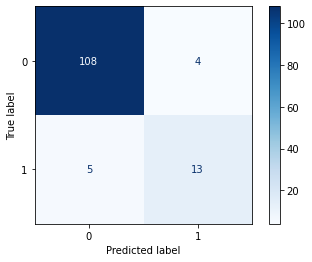

In [124]:
disp = plot_confusion_matrix(clf, X_test1, y_test, cmap ='Blues', values_format='.3g')

In [125]:
print (classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       112
           1       0.76      0.72      0.74        18

    accuracy                           0.93       130
   macro avg       0.86      0.84      0.85       130
weighted avg       0.93      0.93      0.93       130



In [126]:
f2_2 = fbeta_score(y_test, y_pred, beta=2)
R2 =recall_score(y_test, y_pred)
P2 =precision_score(y_test, y_pred)
print("F2 Score: ", f2_2)

F2 Score:  0.7303370786516854


In [127]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc2=roc_auc_score(y_test, y_pred_prob)

AUC on test data = 0.936508


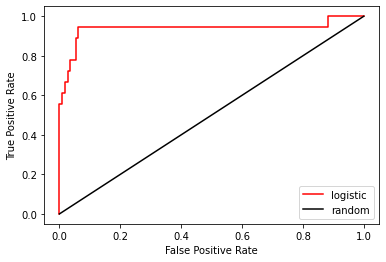

In [128]:
print("AUC on test data = %f" % auc2)
plt.plot(fpr, tpr,'r-',label = 'logistic')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### c. One-Hot Encoding on Categorical:

In [129]:
y = df['result']
X = df.drop(columns=['result'])

In [130]:
var=pd.get_dummies(X,columns =["gender","location","country"])
X=pd.DataFrame(data=var)

__Train/Test Split:__

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15,random_state=10)

In [132]:
scal = StandardScaler()
X_train1 = scal.fit_transform(X_train)
X_test1 = scal.transform(X_test)

__Validation to Get the Best Hyperparameters:__

In [133]:
clf = linear_model.LogisticRegression(max_iter = 3000)
weights= np.linspace(0.0,0.99,100)

W=[{0:x, 1:1.0-x} for x in weights]
param_grid = [    
    {
    'C' : np.logspace(-4, 4, 50),
    'class_weight' :  W
    }
]
f2 = make_scorer(fbeta_score, beta=2)
    

clf = GridSearchCV(clf, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring=f2 )

best_clf = clf.fit(X_train1,y_train)

clf=best_clf.best_estimator_


Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


__Training a Model with the best Hyperparameters:__

In [134]:
clf.fit(X_train1, y_train)

LogisticRegression(C=159.98587196060572, class_weight={0: 0.01, 1: 0.99},
                   max_iter=3000)

In [135]:
y_pred = clf.predict(X_test1)
y_pred_prob = clf.predict_proba(X_test1)
y_pred_prob =y_pred_prob[:,1]

__Displaying Scoring Metrics of the Model:__

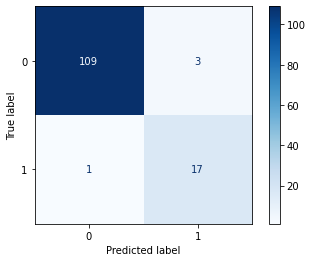

In [136]:
disp = plot_confusion_matrix(clf, X_test1, y_test, cmap ='Blues', values_format='.3g')

In [137]:
auc3=roc_auc_score( y_test, y_pred_prob)
print (classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       112
           1       0.85      0.94      0.89        18

    accuracy                           0.97       130
   macro avg       0.92      0.96      0.94       130
weighted avg       0.97      0.97      0.97       130



In [138]:
f2_3 = fbeta_score(y_test, y_pred, beta=2)
R3 =recall_score(y_test, y_pred)
P3 =precision_score(y_test, y_pred)
print("F2 Score: ", f2_3)

F2 Score:  0.9239130434782609


In [139]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

AUC on test data = 0.975694


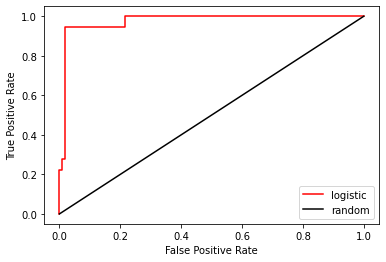

In [140]:
print("AUC on test data = %f" % auc3)
plt.plot(fpr, tpr,'r-',label = 'logistic')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Comparison between without and with Hyperparameters:

To see the effect of hyperparameter tuning, and nominating the best model of them.

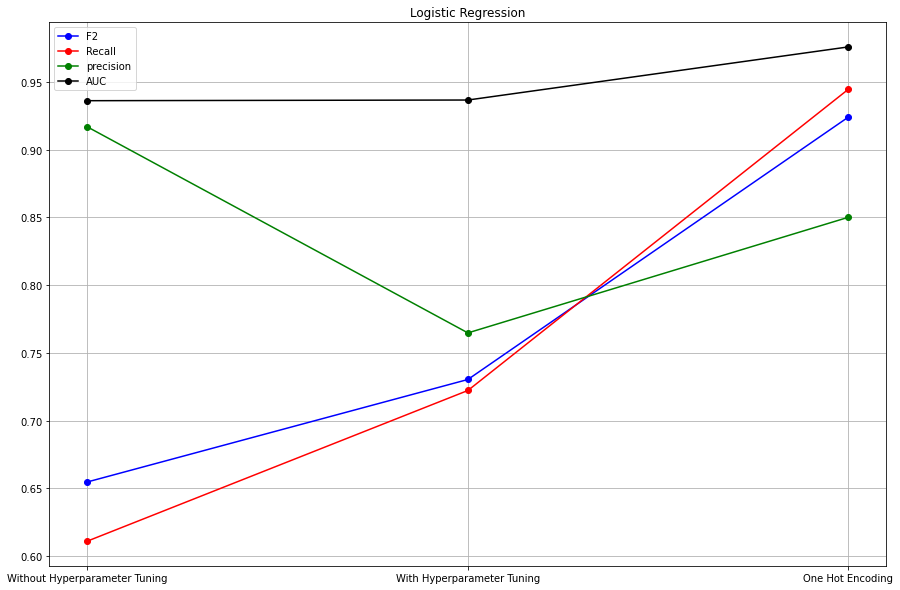

In [141]:
fig = plt.figure(figsize=(15,10))
plt.plot(['Without Hyperparameter Tuning', 'With Hyperparameter Tuning' ,'One Hot Encoding'],[f2_1,f2_2,f2_3],color='b',marker='o',label ='F2')
plt.plot(['Without Hyperparameter Tuning', 'With Hyperparameter Tuning' ,'One Hot Encoding'],[R1,R2,R3],color='r',marker='o',label='Recall')
plt.plot(['Without Hyperparameter Tuning', 'With Hyperparameter Tuning' ,'One Hot Encoding'],[P1,P2,P3],color='g',marker='o',label='precision')
plt.plot(['Without Hyperparameter Tuning', 'With Hyperparameter Tuning' ,'One Hot Encoding'],[auc1,auc2,auc3],color='black',marker='o',label='AUC')

plt.title('Logistic Regression')
plt.legend()
plt.grid()
plt.show()


### Conclusions of Logistic Regression:

Based on the above graph, we can conclude that Hyperparameter Tuning affected the f2-Score positevely, so when we are comparing different classifiers, we will compare with the model with One Hot Encoding & Hyperparameter tuning as a representative of the Logistic Regression.

---

## Comparison between Different Classifiers:

Based upon the nominated model of each classifier, we can visualize the difference in performance between them.

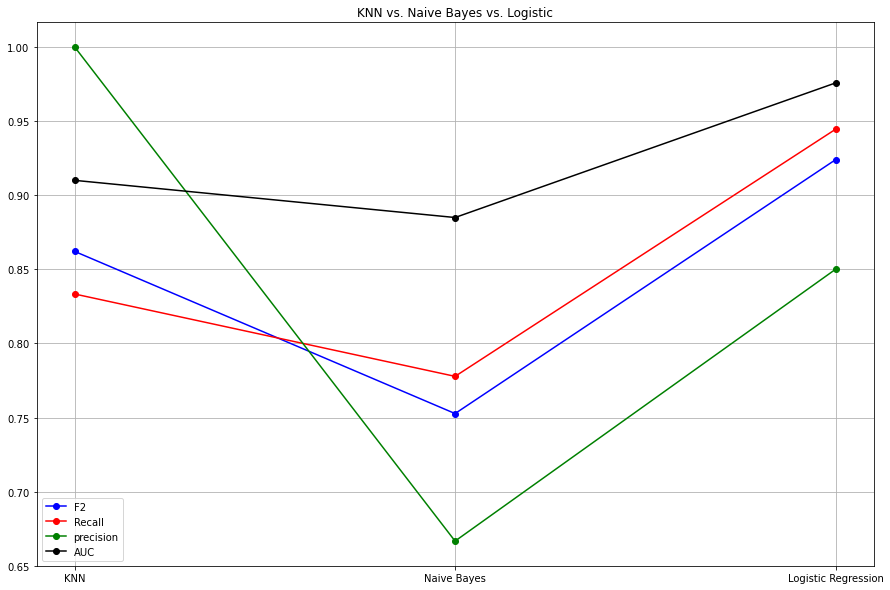

In [142]:
fig = plt.figure(figsize=(15,10))
plt.plot(['KNN', 'Naive Bayes' ,'Logistic Regression'],[Kf2_1,Nf2_1,f2_3],color='b',marker='o',label ='F2')
plt.plot(['KNN', 'Naive Bayes' ,'Logistic Regression'],[Kr1,NR1,R3],color='r',marker='o',label='Recall')
plt.plot(['KNN', 'Naive Bayes' ,'Logistic Regression'],[Kp1,NP1,P3],color='g',marker='o',label='precision')
plt.plot(['KNN', 'Naive Bayes' ,'Logistic Regression'],[Ka1,Nauc1,auc3],color='black',marker='o',label='AUC')

plt.title('KNN vs. Naive Bayes vs. Logistic')
plt.legend()
plt.grid()
plt.show()
